## Visualizations

Alex Lu 

Here's some code to help with visualizing what's going on with my neural networks. 

In [1]:
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import torch
from torch.autograd import Variable
from skimage import io

from models import * 
from utility.data_prep import * 
from utility.evaluation import *

%matplotlib inline
sns.set_style("white")
sns.set_context("poster")

In [26]:
label_names = {
    0:  "Nucleoplasm",  
    1:  "Nuclear membrane",   
    2:  "Nucleoli",   
    3:  "Nucleoli fibrillar center",   
    4:  "Nuclear speckles",
    5:  "Nuclear bodies",   
    6:  "Endoplasmic reticulum",   
    7:  "Golgi apparatus",   
    8:  "Peroxisomes",   
    9:  "Endosomes",   
    10:  "Lysosomes",   
    11:  "Intermediate filaments",   
    12:  "Actin filaments",   
    13:  "Focal adhesion sites",   
    14:  "Microtubules",   
    15:  "Microtubule ends",   
    16:  "Cytokinetic bridge",   
    17:  "Mitotic spindle",   
    18:  "Microtubule organizing center",   
    19:  "Centrosome",   
    20:  "Lipid droplets",   
    21:  "Plasma membrane",   
    22:  "Cell junctions",   
    23:  "Mitochondria",   
    24:  "Aggresome",   
    25:  "Cytosol",   
    26:  "Cytoplasmic bodies",   
    27:  "Rods & rings"
}

In [46]:
def saliency(model, X, y): 
    """
    Args:
        model (TYPE): Description
        X (TYPE): Description
        y (TYPE): Description
    """
    model.eval()

    X_var = Variable(X, requires_grad=True)
    y_var = Variable(y)

    prediction = model(X_var)
    # print prediction
    # print y_var
    #prediction = prediction.gather(1, y_var.view(-1, 1)).squeeze()  

    # temp_grad = torch.FloatTensor(1, model_output.size()[-1]).zero_()
    # temp_grad[0][]

    #temp_grad = torch.from_numpy(y)

#    prediction.backward(y_var.double())

    min_indices = []
    for row in y: 
        print row
        temp = []
        for idx, val in enumerate(row.data.numpy()): 
            if val > 0.0: 
                temp.append(idx)
        min_indices.append(min(temp))
        
    print min_indices
    prediction = prediction.gather(1, torch.LongTensor(min_indices).view(-1, 1)).squeeze()
    prediction.backward(torch.ones(y.shape[0]).double())
#    prediction.backward(torch.ones_like(y_var).double())

    saliency = X_var.grad.data
    print 'shape of gradient backpropped into the image'
    print saliency.shape 
    
    saliency = saliency.abs()
    saliency, i = torch.max(saliency,dim=1)
    
    print 'shape after max'
    print saliency.shape
    
    saliency = saliency.squeeze()
    print 'shape after squeezing'
    print saliency.shape
    
    return saliency.data

In [3]:
def make_image_row(image, sal, subax, title):
    subax[0].imshow(image[0], cmap="Greens")
    subax[1].imshow(image[1], cmap="Reds")
    subax[1].set_title("Microtubules")
    subax[2].imshow(image[2], cmap="Blues")
    subax[2].set_title("Nucleus")
    subax[3].imshow(image[3], cmap="Oranges")
    subax[3].set_title("ER")
    subax[4].imshow(sal)
    subax[4].set_title("Saliency")
    subax[0].set_title("Target")
    for ax in subax: 
        ax.axis('off')
    return subax



In [4]:
# define some paths
labels_csv='./data/train.csv'
root_dir='./data/train/'
model_save_loc = "./utility/weights/larger_architecture_2018_11_29.pt"

In [31]:
model = larger_architecture()
model.load_state_dict(torch.load(model_save_loc))

dataloaders = get_data_loaders(labels_csv=labels_csv, root_dir = root_dir)

writing structures to pickle
----------------------------


In [40]:
sets = []
for i, batch in enumerate(dataloaders['val']):
    sets.append((batch['stack'], batch['labels']))
    if i == 2: break

/Users/alex/miniconda2/lib/python2.7/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/alex/miniconda2/lib/python2.7/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/alex/miniconda2/lib/python2.7/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/alex/miniconda2/lib/python2.7/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/alex/miniconda2/l

tensor([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0])
tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 0])
tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0])
tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0])
tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0])
tensor([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0])
tensor([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0])
tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0])
tensor([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 

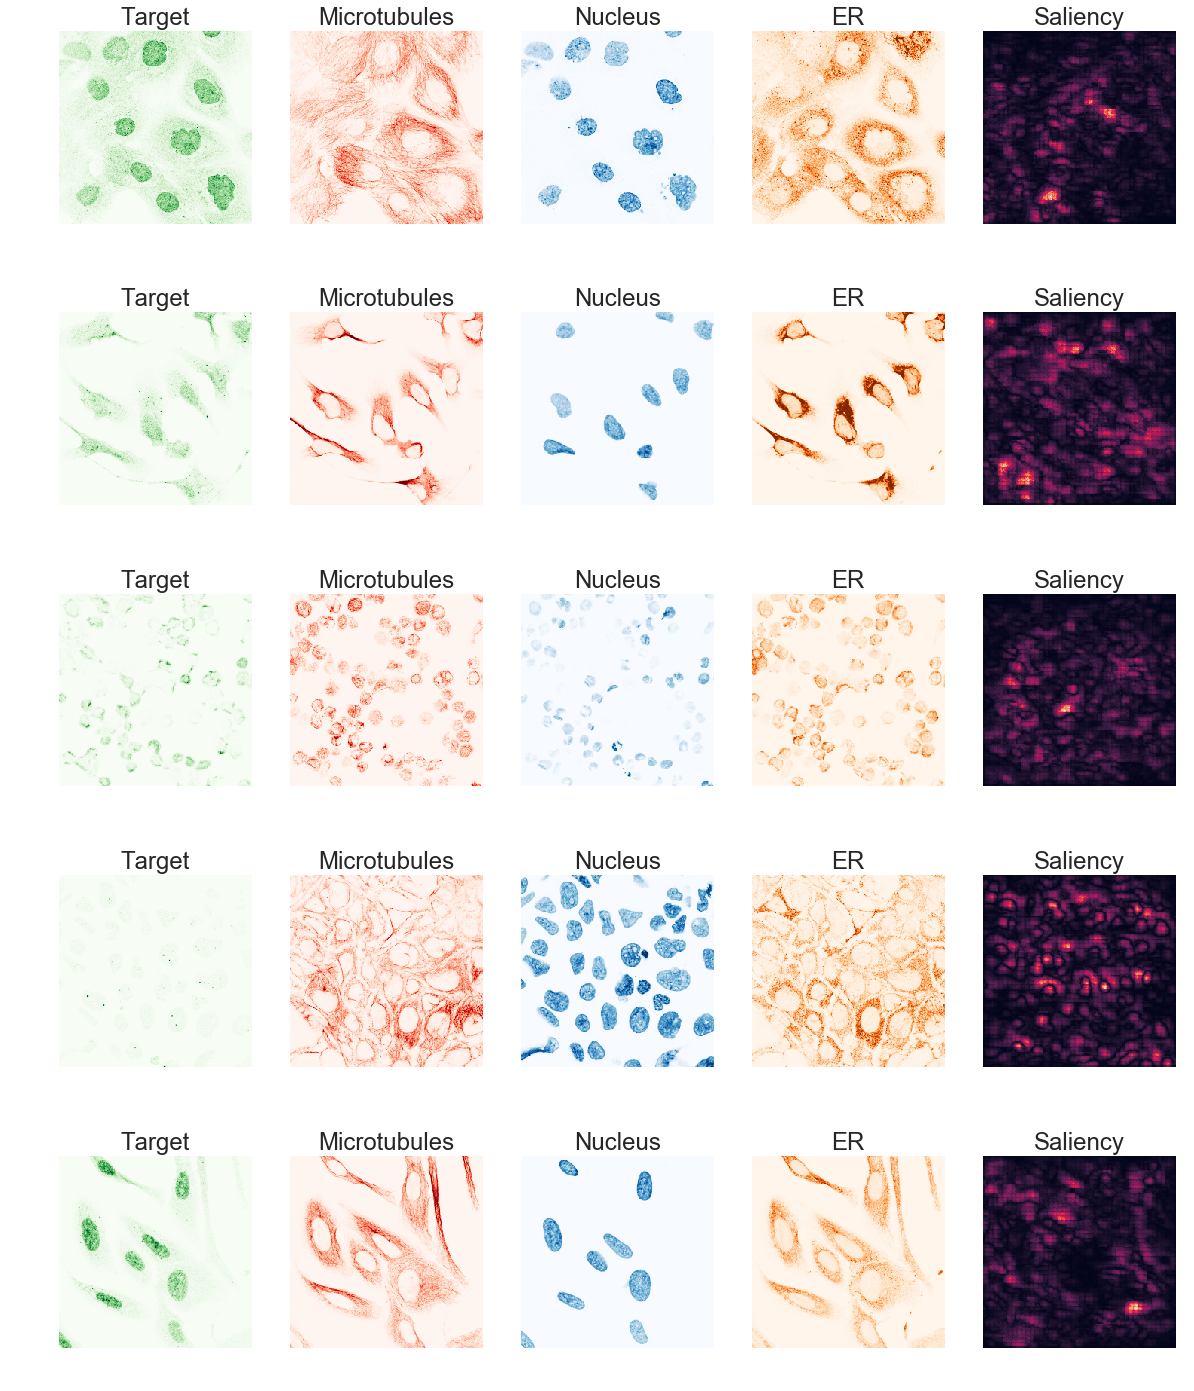

In [47]:
for batch in sets: 

    X, y = batch
    sal = saliency(model.double(), X, y)
    
    fig, ax = plt.subplots(5,5,figsize=(20,5*5))
    if ax.shape == (5,):
        ax = ax.reshape(1,-1)
    for n in range(5):
        make_image_row(X[2*n, :,:,:], sal[2*n,:,:], ax[n], "lol")
    
    if i == 2: break
        

/Users/alex/miniconda2/lib/python2.7/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/alex/miniconda2/lib/python2.7/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/alex/miniconda2/lib/python2.7/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/alex/miniconda2/lib/python2.7/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/alex/miniconda2/l

tensor([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0])
tensor([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0])
tensor([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0])
tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0])
tensor([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0])
tensor([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0])
tensor([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0])
tensor([1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 

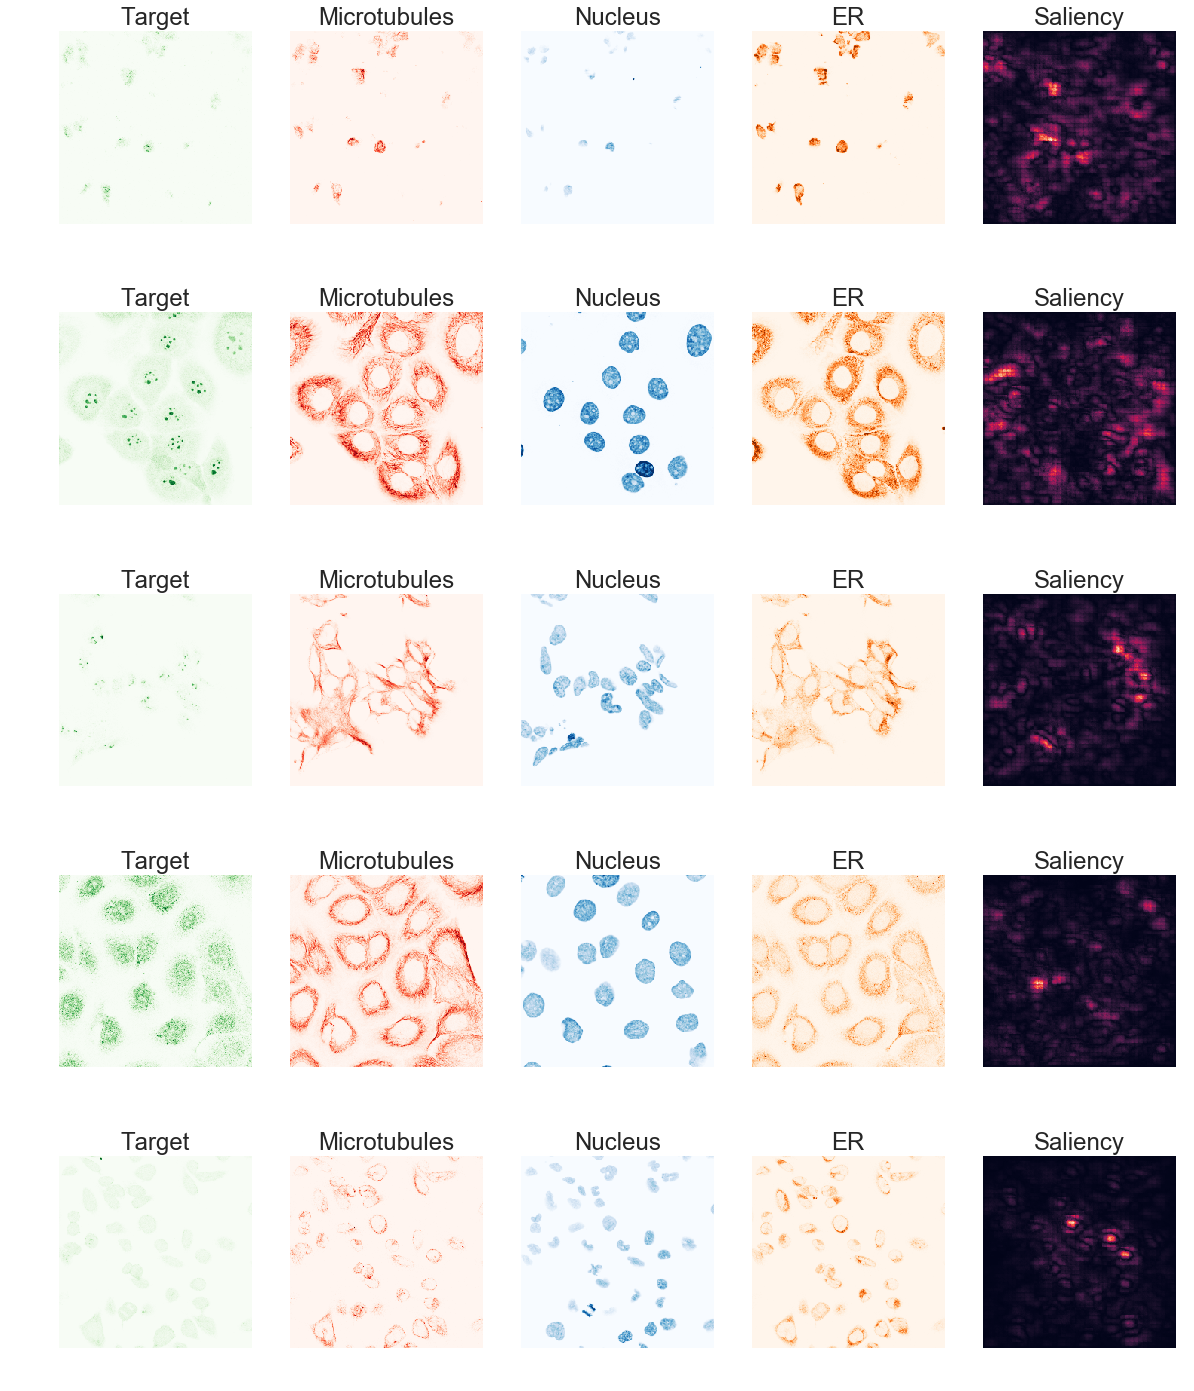

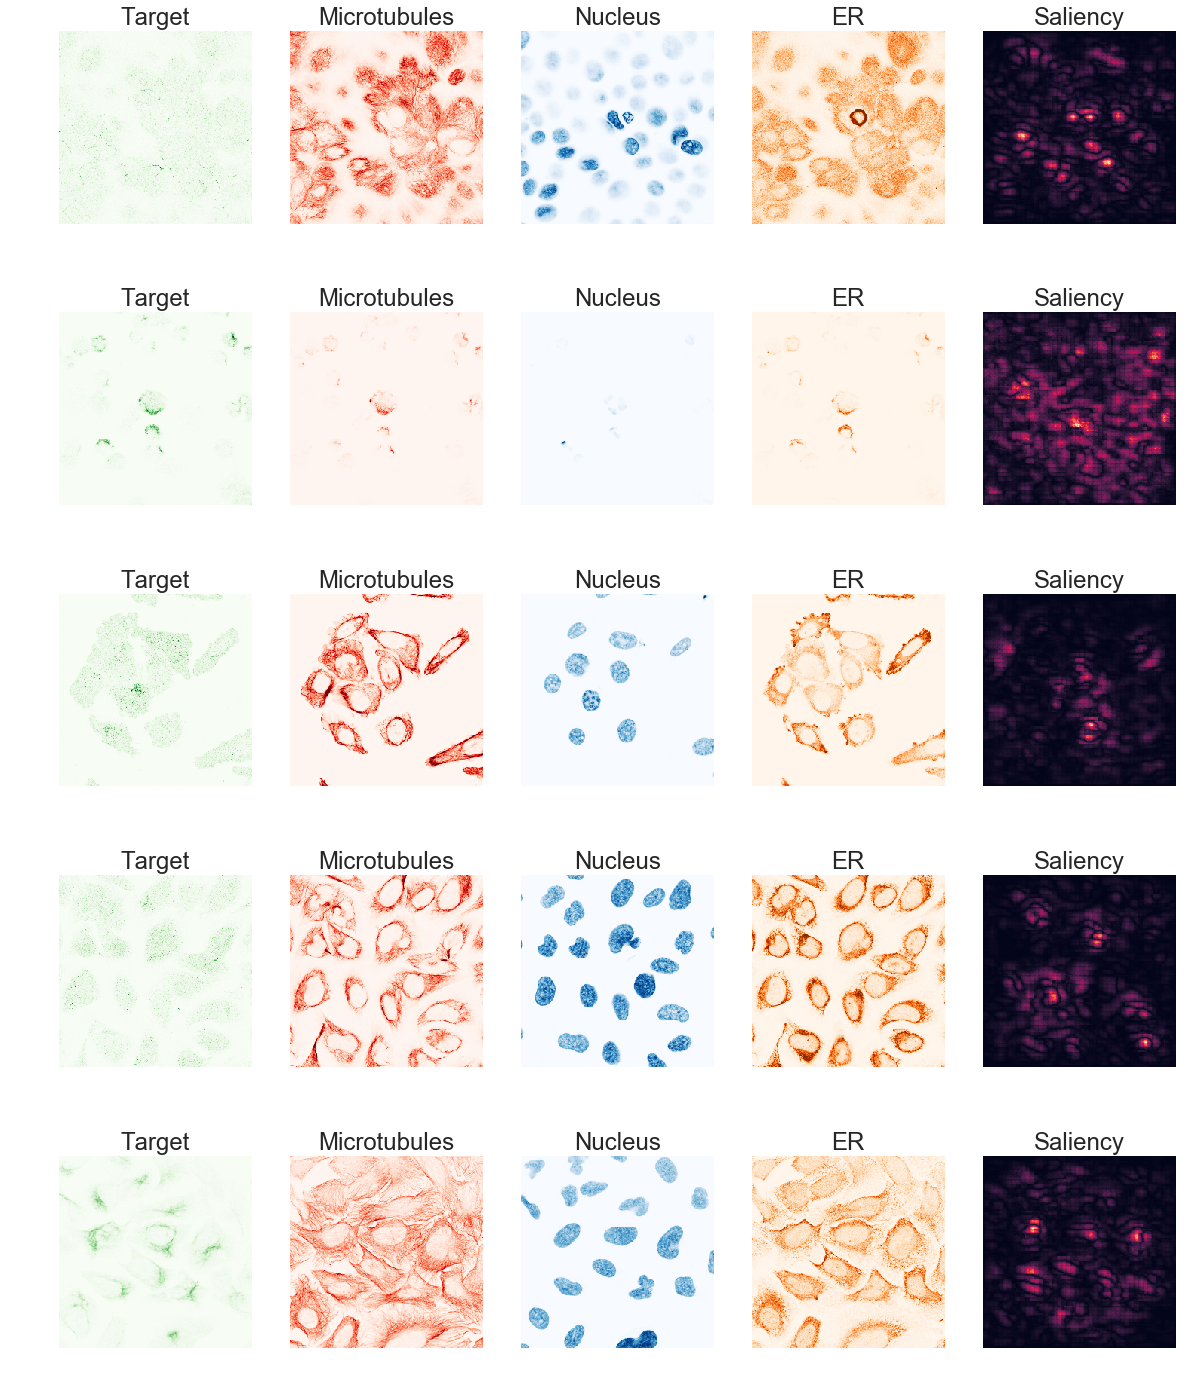

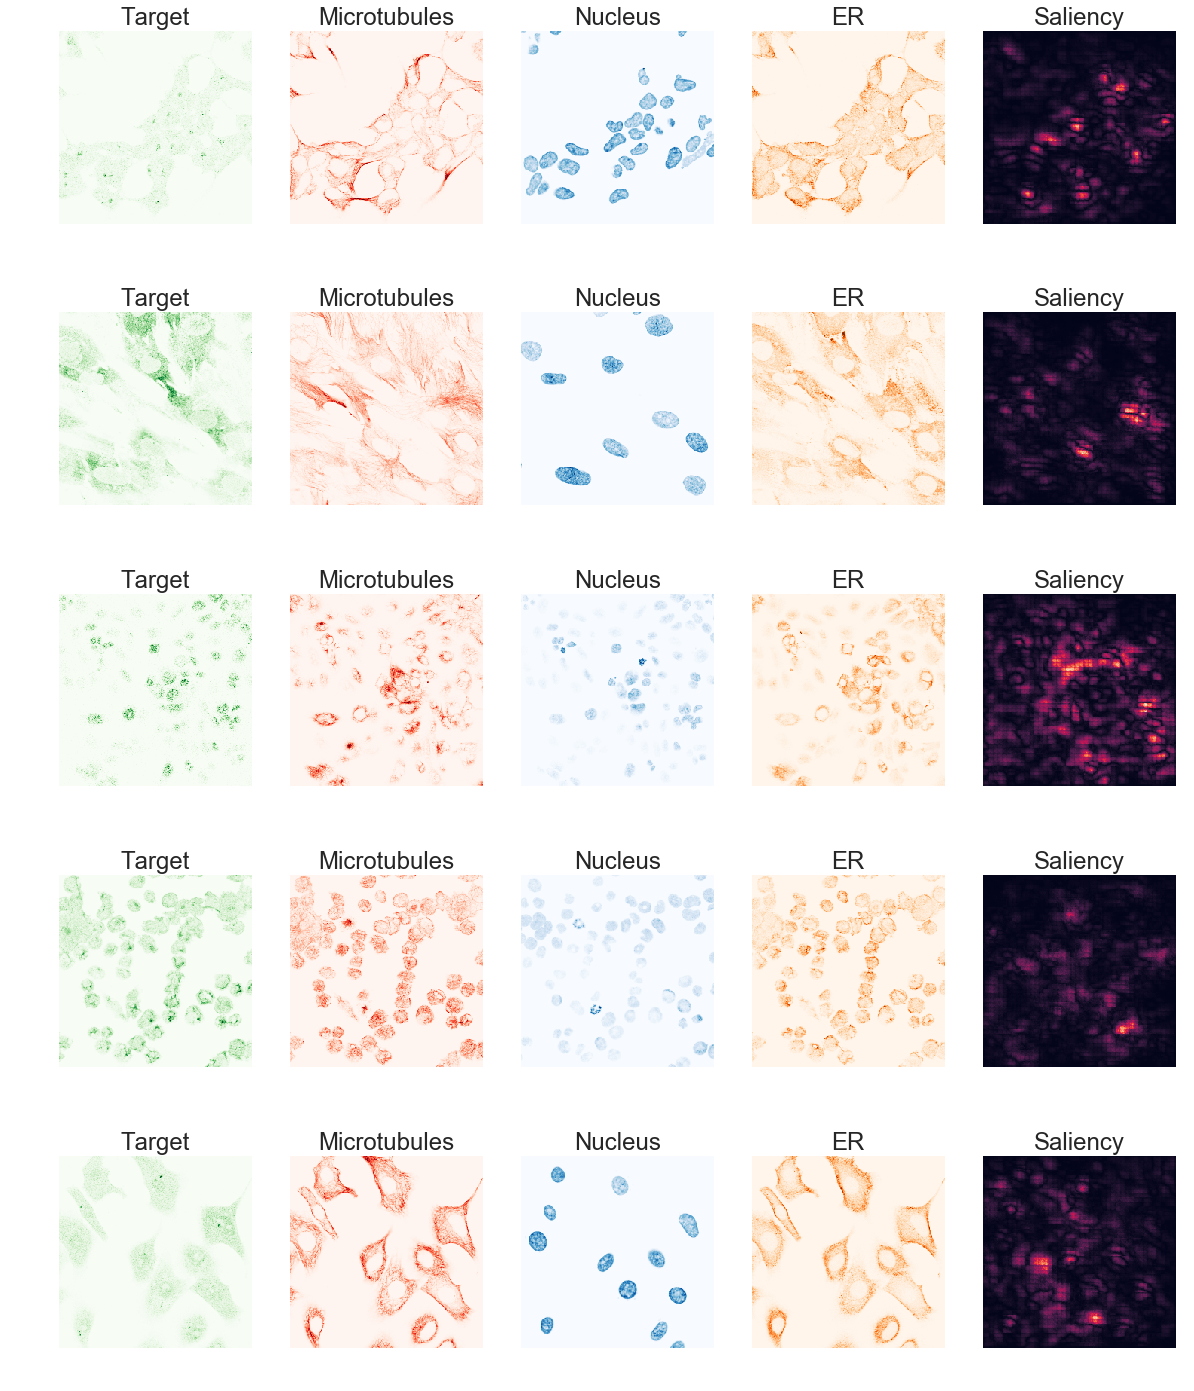

In [38]:
for i, batch in enumerate(dataloaders['val']): 

    X = batch['stack']
    y = batch['labels']
    idx = batch['idx']

    sal = saliency(model.double(), X, y)

#     for j in range(sal.shape[0]):
#         io.imshow(sal[j,:,:])
#         io.imshow
    fig, ax = plt.subplots(5,5,figsize=(20,5*5))
    if ax.shape == (5,):
        ax = ax.reshape(1,-1)
    for n in range(5):
        make_image_row(X[2*n, :,:,:], sal[2*n,:,:], ax[n], "lol")
    
    if i == 2: break
        
        

In [9]:
train_hist = [1.02519, .9304234, .897232, .87925, .8604055, .8394012, .81962, .8034, .78625, .770513, .7569372, .74021, .7247116, .71176, .699671]
val_hist = [0.3246797883823652, 0.30859262049658537, 0.2972579987299553, 0.2881473221122666, 0.2930709695103976, 0.2909181384843545, 0.2887740390361829, 0.2843916650082682, 0.29647841860840424, 0.2926714957627467, 0.2925213998342825, 0.29669118378345927, 0.2962229702426034, 0.30331688084621383, 0.31227006386470596]
f1_hist = [0.48737373737373735, 0.5266406200368465, 0.4849723651610444, 0.5693983863795185, 0.48130103648971573, 0.5241947779683629, 0.4861952861952862, 0.614601994790674, 0.5254176990026047, 0.5521885521885521, 0.5486531986531986, 0.4861952861952862, 0.6137793527638145, 0.5565341978077827, 0.5993809038620359]

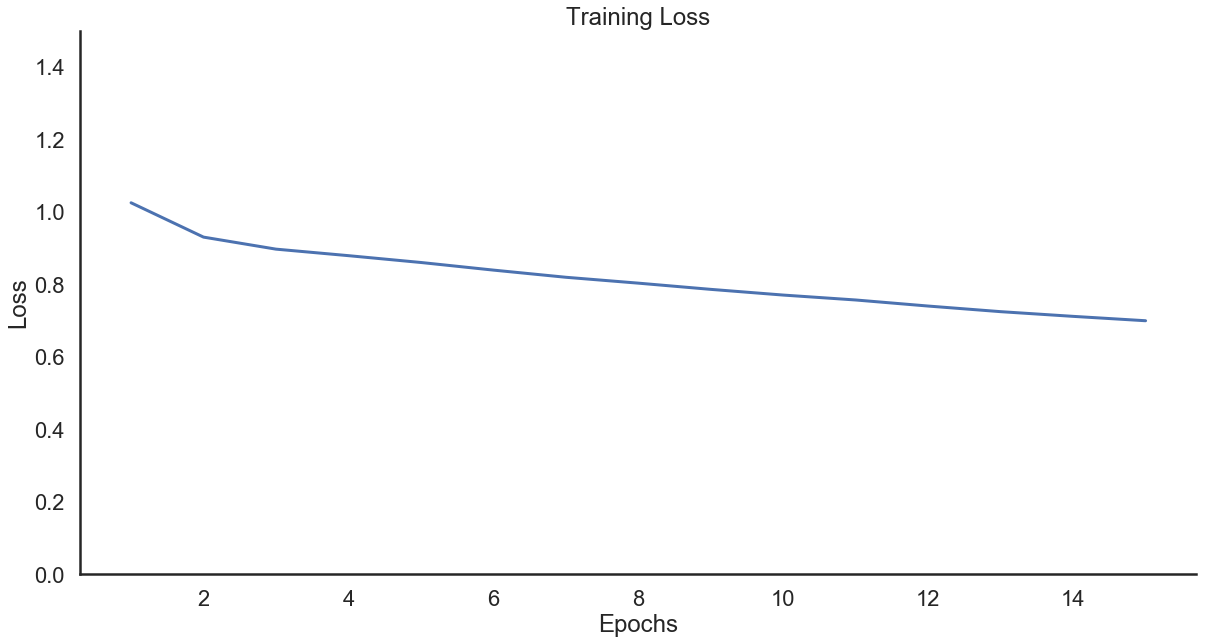

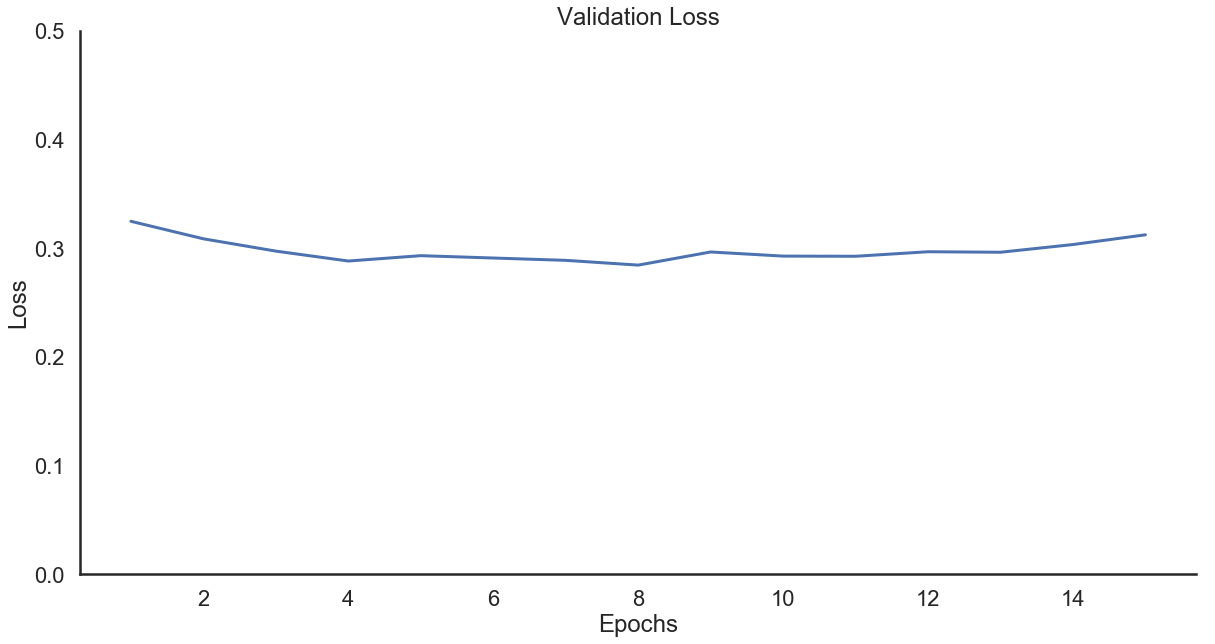

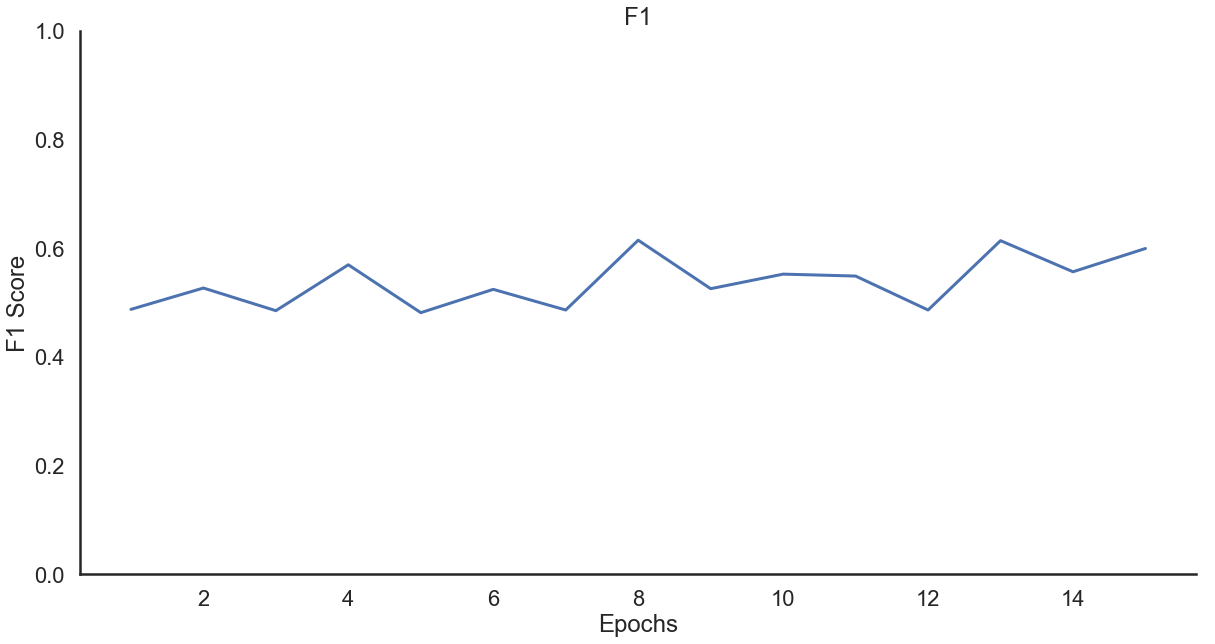

In [23]:
titles = ['Training Loss', 'Validation Loss', 'F1']
ylabs = ['Loss', 'Loss', 'F1 Score']
ymaxes = [1.5, .5, 1]
for i, metric in enumerate([train_hist, val_hist, f1_hist]): 
    plt.figure(figsize=(20,10))
    ax = sns.lineplot(np.arange(1, len(metric)+1), metric)
#     plt.plot(np.arange(1,len(metric)+1), metric)
    plt.title(titles[i])
    plt.xlabel('Epochs')
    plt.ylabel(ylabs[i])
    ax.set_ylim(0, ymaxes[i])
    sns.despine()
    plt.show()